<a href="https://colab.research.google.com/github/deepanshgoyal33/dl_models_implementations/blob/master/with%20and%20without%20dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torchvision import datasets, transforms


transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

26427392it [00:00, 71292733.36it/s]                              


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 564811.43it/s]
  5%|▍         | 212992/4422102 [00:00<00:02, 2082476.35it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:00, 27198439.59it/s]                           
8192it [00:00, 123934.10it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz
Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
  from torch import nn,optim
  import torch.nn.functional as F
  
  class Classifier(nn.Module):
    def __init__(self):
      super().__init__()
      self.fc1 = nn.Linear(784,256)
      self.fc2 = nn.Linear(256,128)
      self.fc3 = nn.Linear(128,64)
      self.fc4 = nn.Linear(64,10)
      
    def forward(self,x):
      x = x.view(x.shape[0],-1)
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = F.relu(self.fc3(x))
      x = F.log_softmax(self.fc4(x), dim = 1)
      
      return x

In [0]:
model = Classifier()

In [0]:
ps = torch.exp(model(testimages))

In [0]:
print(ps.shape)

torch.Size([64, 10])


In [0]:
print(ps)

tensor([[0.1003, 0.0904, 0.0854, 0.1007, 0.1034, 0.0900, 0.0979, 0.1183, 0.1129,
         0.1006],
        [0.1030, 0.0891, 0.0885, 0.1016, 0.1004, 0.0913, 0.0992, 0.1144, 0.1105,
         0.1020],
        [0.1017, 0.0880, 0.0870, 0.0991, 0.1015, 0.0893, 0.0978, 0.1214, 0.1124,
         0.1018],
        [0.0995, 0.0884, 0.0835, 0.1003, 0.1035, 0.0906, 0.0997, 0.1220, 0.1132,
         0.0993],
        [0.0999, 0.0894, 0.0865, 0.0998, 0.1012, 0.0908, 0.0990, 0.1202, 0.1130,
         0.1001],
        [0.1008, 0.0872, 0.0861, 0.1022, 0.1043, 0.0926, 0.1000, 0.1165, 0.1074,
         0.1030],
        [0.1004, 0.0894, 0.0862, 0.1023, 0.1045, 0.0907, 0.0988, 0.1168, 0.1095,
         0.1014],
        [0.1014, 0.0886, 0.0877, 0.1021, 0.1004, 0.0924, 0.0997, 0.1163, 0.1081,
         0.1031],
        [0.1016, 0.0895, 0.0859, 0.1012, 0.1020, 0.0934, 0.1010, 0.1161, 0.1079,
         0.1014],
        [0.1009, 0.0899, 0.0840, 0.1005, 0.1022, 0.0915, 0.1009, 0.1182, 0.1106,
         0.1012],
        [0

In [0]:
top_p , top_class = ps.topk(1,dim=1)
print(top_class[:10,:])

tensor([[7],
        [7],
        [7],
        [7],
        [7],
        [7],
        [7],
        [7],
        [7],
        [7]])


In [0]:
equals = top_class == testlabels.view(*top_class.shape)

In [0]:
equals.shape

torch.Size([64, 1])

In [0]:
accuracy = torch.mean(equals.type(torch.FloatTensor))

In [0]:
accuracy.item()

0.0625

In [0]:

testimages.shape

torch.Size([64, 1, 28, 28])

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

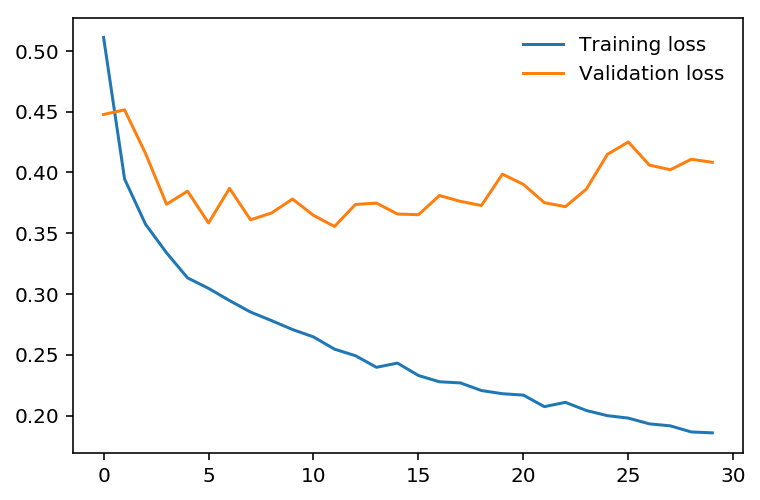

In [0]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [0]:
class classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784,256)
    self.fc2 = nn.Linear(256,128)
    self.fc3 = nn.Linear(128,64)
    self.fc4 = nn.Linear(64,10)
    
    self.dropout = nn.Dropout(p=0.2)
    
  def forward(self, x):
    x = x.view(x.shape[0], -1)
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = self.dropout(F.relu(self.fc3(x)))
    x = F.log_softmax(self.fc4(x),dim=1)
                     
    return x

In [10]:
model = classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.605..  Test Loss: 0.479..  Test Accuracy: 0.828
Epoch: 2/30..  Training Loss: 0.483..  Test Loss: 0.430..  Test Accuracy: 0.842
Epoch: 3/30..  Training Loss: 0.459..  Test Loss: 0.431..  Test Accuracy: 0.843
Epoch: 4/30..  Training Loss: 0.432..  Test Loss: 0.429..  Test Accuracy: 0.849
Epoch: 5/30..  Training Loss: 0.428..  Test Loss: 0.402..  Test Accuracy: 0.860
Epoch: 6/30..  Training Loss: 0.411..  Test Loss: 0.392..  Test Accuracy: 0.855
Epoch: 7/30..  Training Loss: 0.406..  Test Loss: 0.423..  Test Accuracy: 0.860
Epoch: 8/30..  Training Loss: 0.399..  Test Loss: 0.422..  Test Accuracy: 0.857
Epoch: 9/30..  Training Loss: 0.395..  Test Loss: 0.389..  Test Accuracy: 0.864
Epoch: 10/30..  Training Loss: 0.388..  Test Loss: 0.380..  Test Accuracy: 0.867
Epoch: 11/30..  Training Loss: 0.389..  Test Loss: 0.373..  Test Accuracy: 0.866
Epoch: 12/30..  Training Loss: 0.378..  Test Loss: 0.381..  Test Accuracy: 0.867
Epoch: 13/30..  Training Loss: 0.382.

In [11]:
images.shape

torch.Size([16, 1, 28, 28])

In [13]:
trainloader

In [0]:
 %matplotlib inline 
 %config InlineBackend.figure_format ='retina'
 import matplotlib.pyplot as plt 

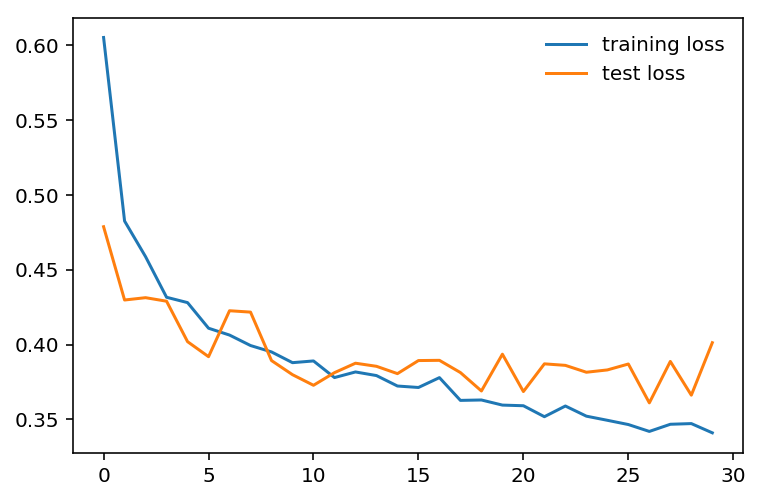

In [15]:
plt.plot(train_losses,label = 'training loss')
plt.plot(test_losses, label='test loss')
plt.legend(frameon = False)